### Group work on linear Transformations and interactions.

In [94]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Loading the dataset

In [95]:
data = pd.read_csv("./data/auto-mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [97]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [98]:
data_df = data.drop(columns=['car name'],axis=1)
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


#### Defined the variables to be used in modeling 

In [99]:
y = data_df['mpg']
X = data_df.drop(columns=['mpg'],axis=1)

In [100]:
y.dtype

dtype('float64')

In [101]:
y.dtype

dtype('float64')

In [102]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


#### Calling the functions

In [103]:
# Calling the functions 
def print_results(sk_model,ols_model):
    print(f"""

StatsModels intercept:    {ols_model.params["const"]}
scikit-learn intercept:   {sk_model.intercept_}

StatsModels coefficient:\n{ols_model.params}
scikit-learn coefficient: {sk_model.coef_}
""")

In [104]:
# Running OLS and skit learn models
def build_ols_sk_model(X,y):
    
    ols_model = sm.OLS(y,sm.add_constant(X))
    ols_results = ols_model.fit()
    
    sk_model = LinearRegression()
    sk_results = sk_model.fit(X=X,y=y)
    
    print_results(sk_results,ols_results)
    
    return (ols_results,sk_results)

In [105]:
ols_results,sk_results =  build_ols_sk_model(X,y)




StatsModels intercept:    -17.218434622018332
scikit-learn intercept:   -17.218434622017508

StatsModels coefficient:
const          -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
model year       0.750773
origin           1.426140
dtype: float64
scikit-learn coefficient: [-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]



#### Scaling 

In [106]:
# Scaling the target
# 1 mpg = 0.425 km/L
# Changing the units of mpg
y_metric = data["mpg"] * 0.425144
y_metric.name = "km/L"
y_metric.head()

0    7.652592
1    6.377160
2    7.652592
3    6.802304
4    7.227448
Name: km/L, dtype: float64

No handles with labels found to put in legend.


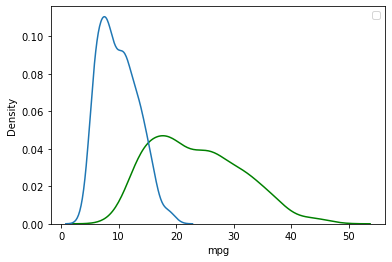

In [107]:
sns.kdeplot(x=y,color="green")
sns.kdeplot(x=y_metric)
plt.legend()

plt.show()

In [108]:
# Scaling the features 
X_metric = X.copy()
# 1 lb = 0.45 kg
X_metric["weight"] = data_df["weight"] * 0.453592

X_metric.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,1589.386368,12.0,70,1
1,8,350.0,165,1675.115256,11.5,70,1
2,8,318.0,150,1558.542112,11.0,70,1
3,8,304.0,150,1557.181336,12.0,70,1
4,8,302.0,140,1564.438808,10.5,70,1


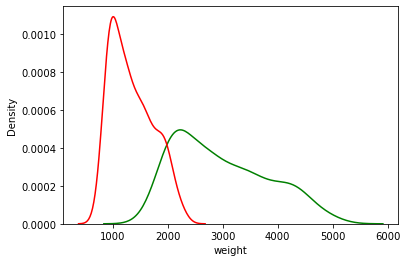

In [113]:
sns.kdeplot(data=X,x="weight",color="green")
sns.kdeplot(data=X_metric,x="weight",color="red")

plt.show()

#### Model results without interactions

In [110]:
ols_results_kg,sk_results_kg = build_ols_sk_model(X=X_metric,y=y)




StatsModels intercept:    -17.218434622017615
scikit-learn intercept:   -17.218434622017543

StatsModels coefficient:
const          -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.014273
acceleration     0.080576
model year       0.750773
origin           1.426140
dtype: float64
scikit-learn coefficient: [-0.49337632  0.01989564 -0.01695114 -0.01427283  0.08057584  0.75077268
  1.4261405 ]



In [111]:
ols_results_kg.rsquared

0.8214780764810597

#### Interaction

In [115]:
x_interaction_numerical = X.copy()
x_interaction_numerical["weight x horsepower"] = x_interaction_numerical["horsepower"] * x_interaction_numerical["weight"]
x_interaction_numerical.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,weight x horsepower
0,8,307.0,130,3504,12.0,70,1,455520
1,8,350.0,165,3693,11.5,70,1,609345
2,8,318.0,150,3436,11.0,70,1,515400
3,8,304.0,150,3433,12.0,70,1,514950
4,8,302.0,140,3449,10.5,70,1,482860


In [116]:
ols_num_inter_results,sk_num_inter_results =  build_ols_sk_model(X=x_interaction_numerical,y=y)



StatsModels intercept:    2.875748260332685
scikit-learn intercept:   2.875748260337236

StatsModels coefficient:
const                  2.875748
cylinders             -0.029551
displacement           0.005950
horsepower            -0.231327
weight                -0.011215
acceleration          -0.090193
model year             0.769461
origin                 0.834402
weight x horsepower    0.000055
dtype: float64
scikit-learn coefficient: [-2.95514105e-02  5.94989005e-03 -2.31326725e-01 -1.12146512e-02
 -9.01930212e-02  7.69461261e-01  8.34401609e-01  5.52885253e-05]



In [117]:
ols_num_inter_results.rsquared

0.8618378127814719